In [1]:
%cd ../

/home/zulqarnain/develop/htfatorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/dataset/util.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import OrderedDict, Sequence
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/zulqarnain

In [ ]:
from scipy.spatial import distance
from scipy import stats
import nilearn.plotting as niplot
import statsmodels.stats.multitest as smt

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
affvids_db = niidb.FMriActivationsDb('data/affvids2018_mc_zrest.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in affvids_db.all() if 'rest' not in b.task], mask='/data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz', num_factors=100, embedding_dim=2)

01/24/2020 13:03:35 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub10_run02_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/24/2020 13:03:56 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub10_run03_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed i

01/24/2020 13:09:09 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub15_run02_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/24/2020 13:09:38 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub15_run03_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed i

01/24/2020 13:16:03 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub23_run02_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/24/2020 13:16:26 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub25_run01_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed i

01/24/2020 13:22:18 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub05_run01_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
01/24/2020 13:22:47 Loading Nifti image /data/zulqarnain/AffVids_mcwm/motion_corrected/sub05_run02_mc_MNI_masked.nii.gz with mask /data/zulqarnain/AffVids_mcwm/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed i

In [7]:
# dtfa.load_state('data/affvids_norest_k100_n1000_09282019_000055') #run for aistats paper on non-MC data

In [8]:
dtfa.load_state('data/affvids_mc_norest_rz_k100_n1000_01232020_000625') 

In [9]:
def task_labeler(task):
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

In [10]:
def block_task_labeler(block):
    return task_labeler(block.task)

In [11]:
validation_filters = affvids_db.inference_filter(training=True)
validation_blockss = [b for (b, block) in enumerate(dtfa._blocks) if validation_filters(block)]

In [12]:
len(validation_blockss)

690

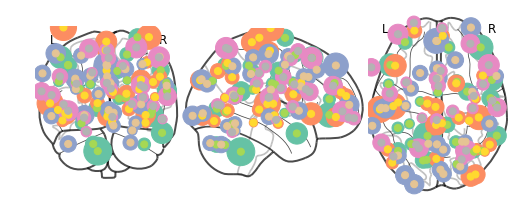

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


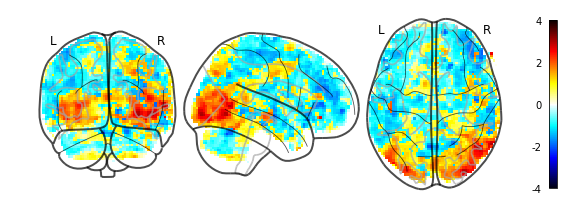

01/24/2020 13:31:35 Reconstruction Error (Frobenius Norm): 1.16226204e+02 out of 1.40108630e+03


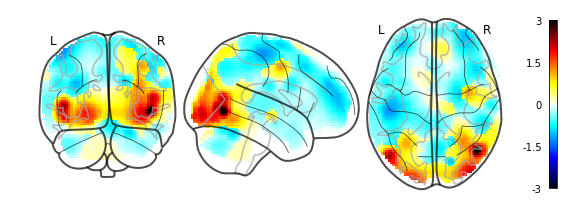

01/24/2020 13:31:42 Reconstruction Error (Frobenius Norm): 5.56411011e+02 out of 1.40108630e+03


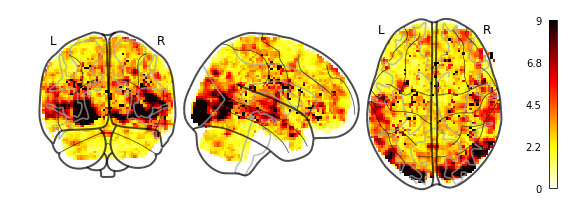

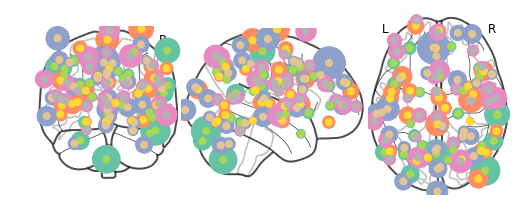

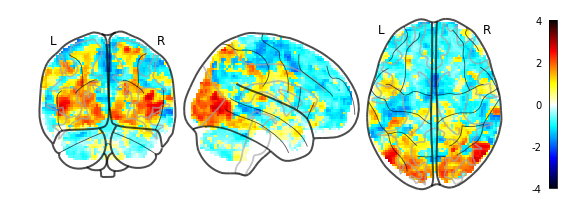

01/24/2020 13:31:52 Reconstruction Error (Frobenius Norm): 9.93535919e+01 out of 1.31921167e+03


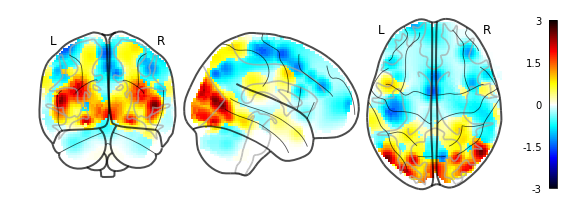

01/24/2020 13:31:59 Reconstruction Error (Frobenius Norm): 3.53533783e+02 out of 1.31921167e+03


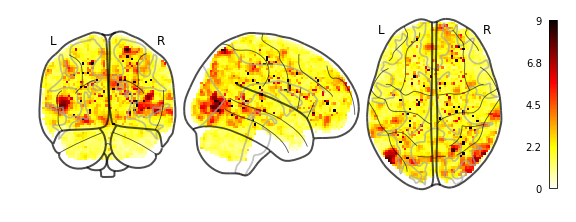

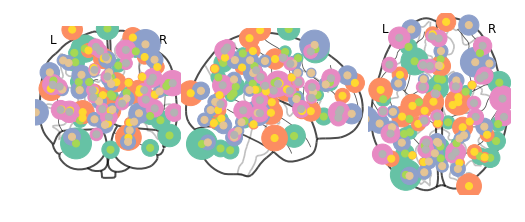

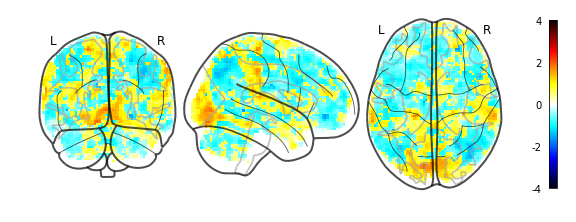

01/24/2020 13:32:10 Reconstruction Error (Frobenius Norm): 8.64203949e+01 out of 1.42776978e+03


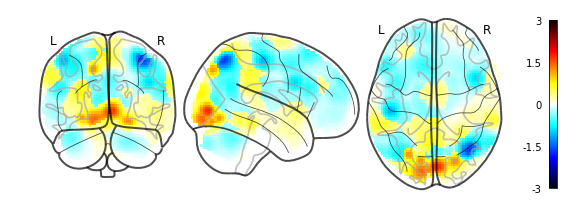

01/24/2020 13:32:17 Reconstruction Error (Frobenius Norm): 4.91896820e+02 out of 1.42776978e+03


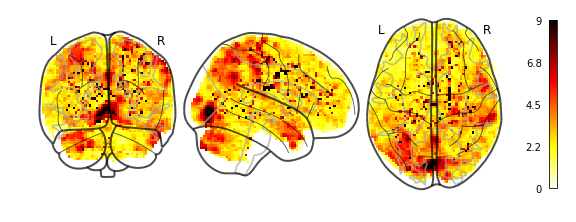

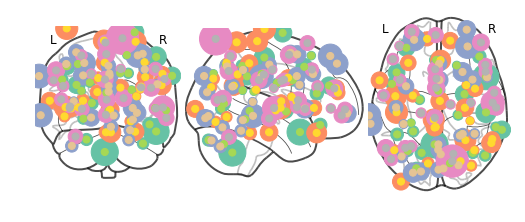

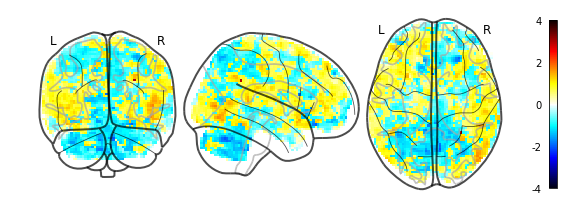

01/24/2020 13:32:30 Reconstruction Error (Frobenius Norm): 9.46960373e+01 out of 1.32700098e+03


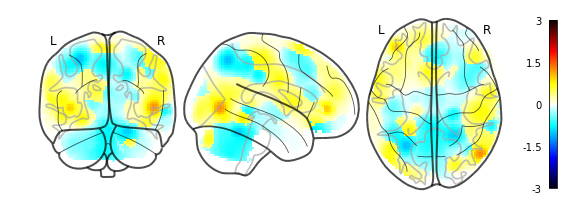

01/24/2020 13:32:36 Reconstruction Error (Frobenius Norm): 4.09793671e+02 out of 1.32700098e+03


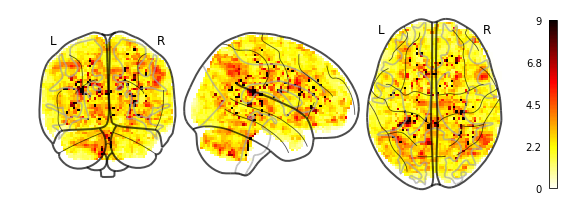

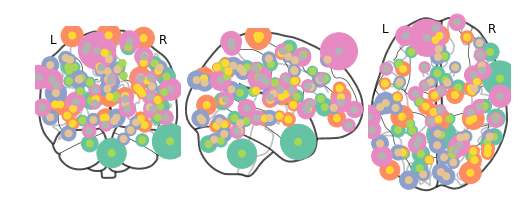

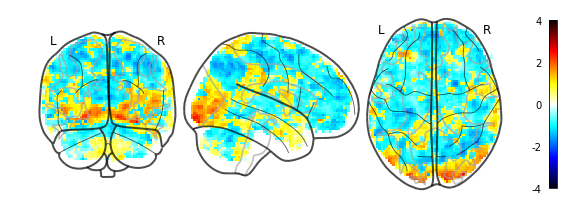

01/24/2020 13:32:47 Reconstruction Error (Frobenius Norm): 1.02445999e+02 out of 1.23006885e+03


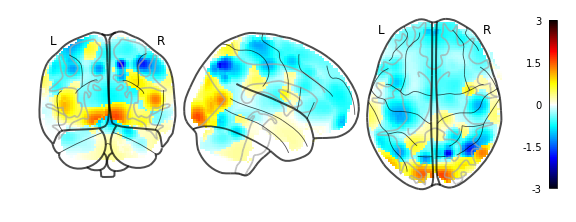

01/24/2020 13:32:55 Reconstruction Error (Frobenius Norm): 3.20444977e+02 out of 1.23006885e+03


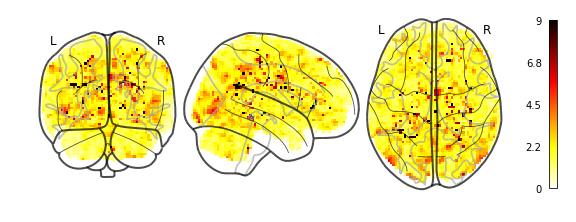

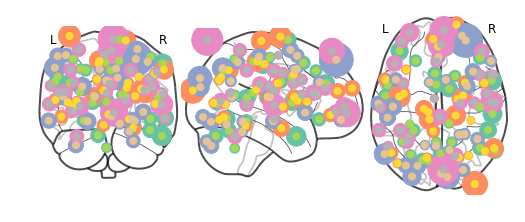

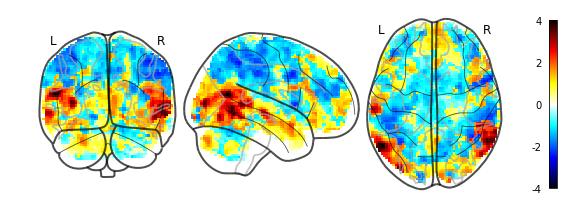

01/24/2020 13:33:06 Reconstruction Error (Frobenius Norm): 1.16497627e+02 out of 1.44235107e+03


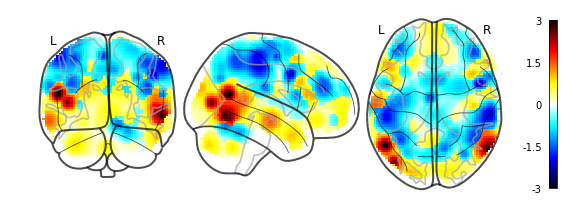

01/24/2020 13:33:12 Reconstruction Error (Frobenius Norm): 5.41757935e+02 out of 1.44235107e+03


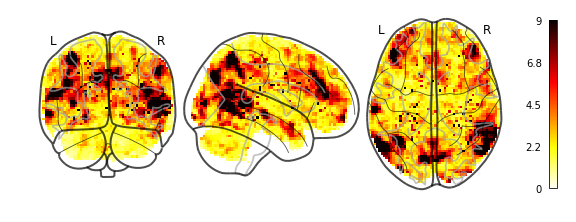

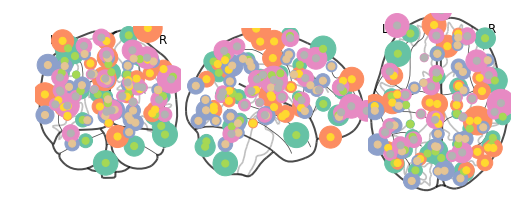

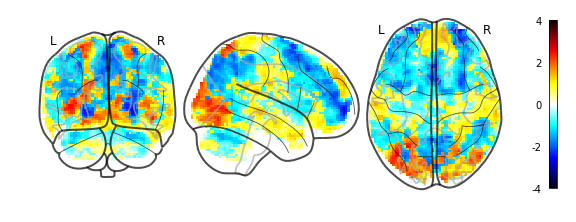

01/24/2020 13:33:22 Reconstruction Error (Frobenius Norm): 1.11375084e+02 out of 1.45617688e+03


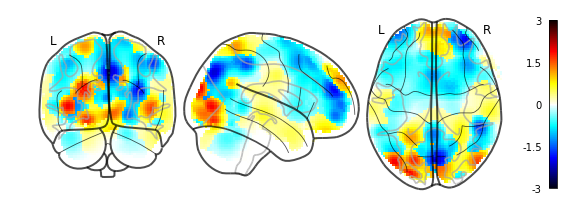

01/24/2020 13:33:29 Reconstruction Error (Frobenius Norm): 5.73707031e+02 out of 1.45617688e+03


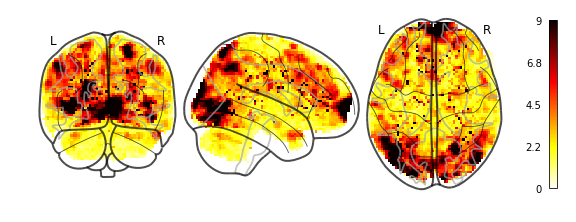

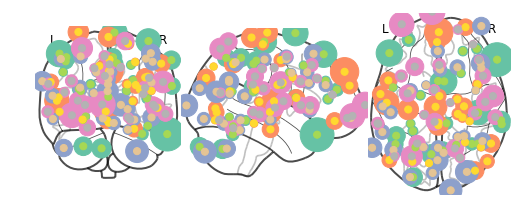

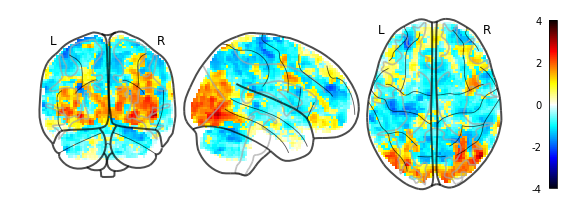

01/24/2020 13:33:39 Reconstruction Error (Frobenius Norm): 1.00418121e+02 out of 1.28519971e+03


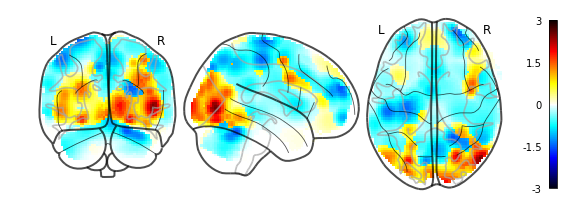

01/24/2020 13:33:45 Reconstruction Error (Frobenius Norm): 3.80378998e+02 out of 1.28519971e+03


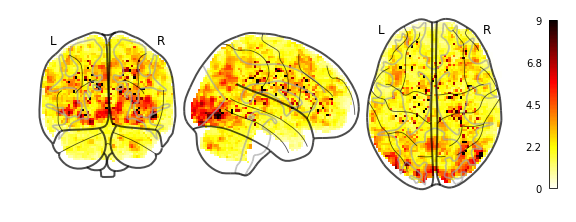

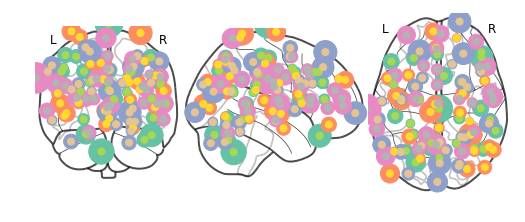

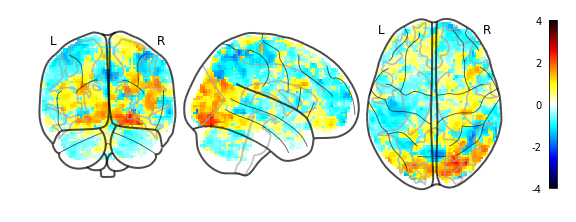

01/24/2020 13:33:55 Reconstruction Error (Frobenius Norm): 8.07872849e+01 out of 1.34815405e+03


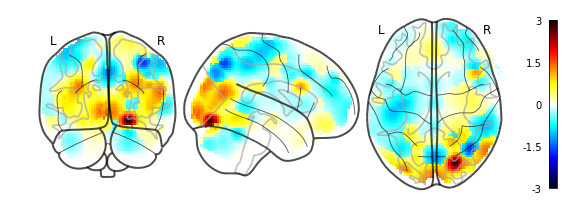

01/24/2020 13:34:01 Reconstruction Error (Frobenius Norm): 4.26947601e+02 out of 1.34815405e+03


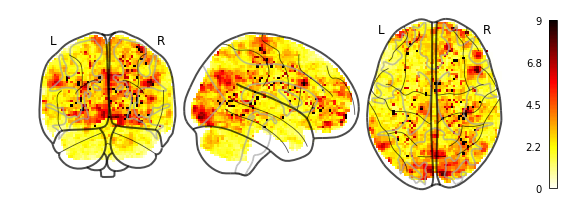

In [13]:
validation_filter = affvids_db.inference_filter(training=False)
validation_blocks = [b for (b, block) in enumerate(dtfa._blocks) if validation_filter(block)]

for index in validation_blocks[0:-1:2]:
    dtfa.plot_factor_centers(index)
    dtfa.plot_original_brain(index, labeler=lambda b: None, zscore_bound=4., t=None)
    dtfa.plot_reconstruction(index, labeler=lambda b: None, t=None)
    dtfa.plot_reconstruction_diff(index, labeler=lambda b: None, t=None)

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


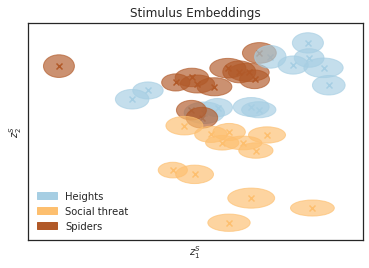

In [14]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Paired',
                            filename='affvids_norest_task_embedding.pdf')

In [15]:
def subject_labeler(subject):
    return 'Subject %d' % subject

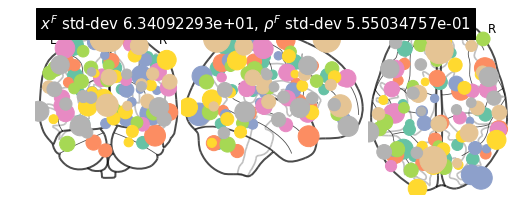

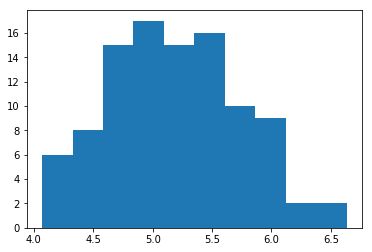

(<nilearn.plotting.displays.OrthoProjector at 0x7f3dedfcc0f0>,
 tensor([[ -36.6098,  -63.6754,   67.5056],
         [  49.7401,  -27.2808,   50.5100],
         [ -30.1283,  -42.9384,  -12.2021],
         [ -35.0247,   41.8576,   36.2056],
         [   5.9654,  -73.9695,   43.8353],
         [  13.6169,   37.5728,   21.3876],
         [  36.3773,  -73.9048,  -34.8803],
         [  41.9298,  -23.6343,   55.9028],
         [ -25.2661,  -70.9534,  -14.2995],
         [  20.2002,  -59.2023,   21.0082],
         [ -29.8589,  -37.0419,   18.7968],
         [ -37.0021,  -16.3985,   37.3055],
         [   1.8733,    6.8975,   50.6361],
         [  -0.9654,   10.7850,    8.0479],
         [  53.1949,   24.0755,    3.5355],
         [ -45.3658,  -69.6160,   49.5941],
         [  49.1952,   21.5442,  -27.4531],
         [  23.9976,   -2.4355,   73.4399],
         [ -35.5062,   26.0299,   46.6924],
         [  -3.1456,  -53.5851,  -43.0456],
         [  64.1347,  -42.5010,   -2.7463],
         [ -4

In [16]:
dtfa.visualize_factor_embedding()

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


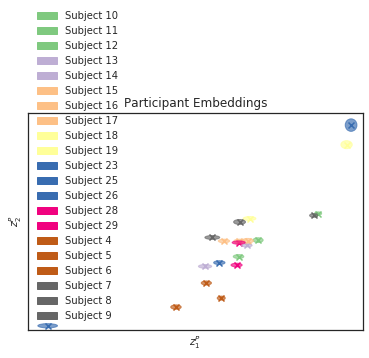

In [17]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

In [18]:
def subject_task_blocks(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label and task_labeler(b.task) == task_label:
            yield b

In [19]:
def subject_blocks(subject_label, subject_labeler=subject_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label:
            yield b

In [20]:
def subject_fear_ratings(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [21]:
def subject_task_fear_ratings(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in subject_task_blocks(subject_label, task_label, subject_labeler, task_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [22]:
def fear_labeler(subject, task, task_labeler=task_labeler, threshold=0.5):
    subject_ratings = [rating for rating in subject_task_fear_ratings(subject, task, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Afraid of %s' % task
        return 'Unafraid of %s' % task
    result = np.mean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [23]:
def subject_fear_labeler(subject, threshold=0.5):
    subject_ratings = [rating for rating in subject_fear_ratings(subject, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Fearful'
        return 'Not fearful'
    result = np.nanmean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [24]:
def subject_average_fear_labeler(subject):
    return subject_fear_labeler(subject, threshold=None)

In [25]:
def heights_fear_labeler(subject):
    return fear_labeler(subject, 'Heights', threshold=None)

In [26]:
def spiders_fear_labeler(subject):
    return fear_labeler(subject, 'Spiders', threshold=None)

In [27]:
def social_threat_fear_labeler(subject):
    return fear_labeler(subject, 'Social threat', threshold=None)

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


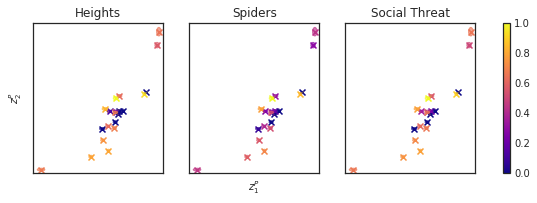

In [28]:
dtfa.heatmap_subject_embedding(heatmaps=[heights_fear_labeler, spiders_fear_labeler, social_threat_fear_labeler],
                               titles=['Heights', 'Spiders', 'Social Threat'], colormap='plasma', filename='affvids_norest_subject_heatmap.pdf')

In [67]:
### this is still Work in Progress ###
hyperparams = dtfa.variational.hyperparams.state_vardict()
all_weights = hyperparams['weights']['mu'].data.numpy()
all_factor_centers = hyperparams['factor_centers']['mu'].data.numpy()
all_factor_widths = np.exp(hyperparams['factor_log_widths']['mu'].data.numpy())
spider_matrix = []
social_matrix = []
heights_matrix = []
for i in range(dtfa.num_blocks):
    if block_task_labeler(dtfa._blocks[i]) == 'Spiders':
        spider_matrix.append(np.corrcoef(all_weights[i,:,:].T))
    elif  block_task_labeler(dtfa._blocks[i]) == 'Social threat':
        social_matrix.append(np.corrcoef(all_weights[i,:,:].T))
    elif  block_task_labeler(dtfa._blocks[i]) == 'Heights':
        heights_matrix.append(np.corrcoef(all_weights[i,:,:].T))
spider_matrix = (np.array(spider_matrix))
social_matrix = (np.array(social_matrix))
heights_matrix = (np.array(heights_matrix))

spider_matrix[spider_matrix < 0] = 0
social_matrix[social_matrix < 0] = 0
heights_matrix[heights_matrix < 0] = 0

spider_vectors = np.zeros(shape=(spider_matrix.shape[0],4950))
for i in range(spider_matrix.shape[0]):
    spider_vectors[i,:] = distance.squareform(spider_matrix[i,:,:],checks=False)

social_vectors = np.zeros(shape=(social_matrix.shape[0],4950))
for i in range(social_matrix.shape[0]):
    social_vectors[i,:] = distance.squareform(social_matrix[i,:,:],checks=False)
    
heights_vectors = np.zeros(shape=(heights_matrix.shape[0],4950))
for i in range(heights_matrix.shape[0]):
    heights_vectors[i,:] = distance.squareform(heights_matrix[i,:,:],checks=False)
    
spider_vectors_mean = spider_vectors.mean(0)
spider_vectors_std = spider_vectors.std(0)
social_vectors_mean = social_vectors.mean(0)
social_vectors_std = social_vectors.std(0)
heights_vectors_mean = heights_vectors.mean(0)
heights_vectors_std = heights_vectors.std(0)

In [69]:
heights_vectors.shape

(236, 4950)

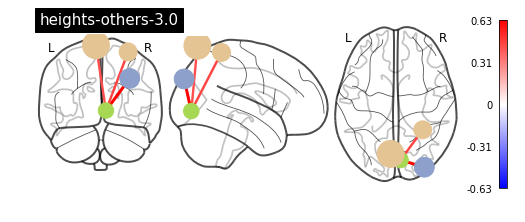

In [70]:
### heights vs others ###
other_vectors = np.vstack((spider_vectors,social_vectors))
other_vectors_mean = other_vectors.mean(0)
other_vectors_std = other_vectors.std(0)
significance_flags = np.zeros(4950,)
p_original = []
t_original = []
for i in range(4950):
    t,p = stats.ttest_ind(heights_vectors[:,i],other_vectors[:,i],)
    p_original.append(p)
    t_original.append(t)
p_corrected = smt.multipletests(p_original,method='fdr_by')[1]
for i in range(4950):
    if p_corrected[i] < 0.05 and t_original[i]>0:
        significance_flags[i] = 1
significant_edges = significance_flags.sum()
significance_flags =distance.squareform(significance_flags)
use_factors = np.where(significance_flags.sum(0) > 0)[0]
node_sizes = np.zeros(100,)
node_sizes[use_factors] = all_factor_widths[0,use_factors]
heights_connectome = distance.squareform(heights_vectors_mean) * (significance_flags)
if significant_edges > 0:
    niplot.plot_connectome(heights_connectome,all_factor_centers[0,:,:],node_size=node_sizes,
                           colorbar=True,title='heights-others-'+str(significant_edges))#,edge_threshold="75%")
else:
    print('no significant edges found')

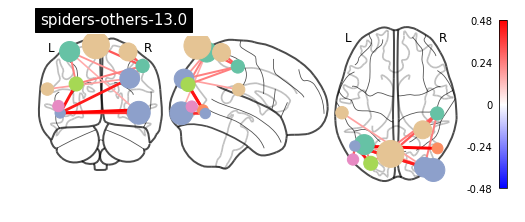

In [72]:
### spiders vs others ###
other_vectors = np.vstack((heights_vectors,social_vectors))
other_vectors_mean = other_vectors.mean(0)
other_vectors_std = other_vectors.std(0)
significance_flags = np.zeros(4950,)
p_original = []
t_original = []
for i in range(4950):
    t,p = stats.ttest_ind(spider_vectors[:,i],other_vectors[:,i],)
    p_original.append(p)
    t_original.append(t)
p_corrected = smt.multipletests(p_original,method='fdr_by')[1]
for i in range(4950):
    if p_corrected[i] < 0.05 and t_original[i]>0:
        significance_flags[i] = 1
significant_edges = significance_flags.sum()
significance_flags =distance.squareform(significance_flags)
use_factors = np.where(significance_flags.sum(0) > 0)[0]
node_sizes = np.zeros(100,)
node_sizes[use_factors] = all_factor_widths[0,use_factors]
spider_connectome = distance.squareform(spider_vectors_mean) * significance_flags
if significant_edges > 0:
    niplot.plot_connectome(spider_connectome,all_factor_centers[0,:,:],node_size=node_sizes,
                       colorbar=True,title='spiders-others-'+str(significant_edges))#,edge_threshold="75%")
else:
    print('no significant edges found')

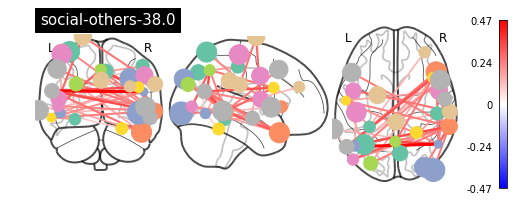

In [74]:
### social vs others ###
other_vectors = np.vstack((heights_vectors,spider_vectors))
other_vectors_mean = other_vectors.mean(0)
other_vectors_std = other_vectors.std(0)
significance_flags = np.zeros(4950,)
p_original = []
t_original = []
for i in range(4950):
    t,p = stats.ttest_ind(social_vectors[:,i],other_vectors[:,i],)
    p_original.append(p)
    t_original.append(t)
p_corrected = smt.multipletests(p_original,method='fdr_by')[1]
for i in range(4950):
    if p_corrected[i] < 0.05 and t_original[i]>0:
        significance_flags[i] = 1
significant_edges = significance_flags.sum()
significance_flags =distance.squareform(significance_flags)
use_factors = np.where(significance_flags.sum(0) > 0)[0]
node_sizes = np.zeros(100,)
node_sizes[use_factors] = all_factor_widths[0,use_factors]
social_connectome = distance.squareform(social_vectors_mean) * (significance_flags)
if significant_edges > 0:
    niplot.plot_connectome(social_connectome,all_factor_centers[0,:,:],node_size=node_sizes,
                           colorbar=True,title='social-others-'+str(significant_edges))#,edge_threshold="75%")
else:
    print('no significant edges found')

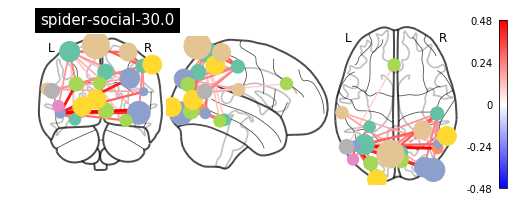

In [75]:
### spider vs social ###
p_original = []
t_original = []
significance_flags = np.zeros(4950,)
for i in range(4950):
    t,p = stats.ttest_ind(spider_vectors[:,i],social_vectors[:,i],)
    p_original.append(p)
    t_original.append(t)
p_corrected = smt.multipletests(p_original,method='fdr_by')[1]
for i in range(4950):
    if p_corrected[i] < 0.05 and t_original[i]>0:
        significance_flags[i] = 1
significant_edges = significance_flags.sum()
significance_flags =distance.squareform(significance_flags)
use_factors = np.where(significance_flags.sum(0) > 0)[0]
node_sizes = np.zeros(100,)
node_sizes[use_factors] = all_factor_widths[0,use_factors]
spider_connectome = distance.squareform(spider_vectors_mean) * significance_flags
if significant_edges > 0:
    niplot.plot_connectome(spider_connectome,all_factor_centers[0,:,:],node_size=node_sizes,
                       colorbar=True,title='spider-social-'+str(significant_edges))#,edge_threshold="75%")
else:
    print('no significant edges found')

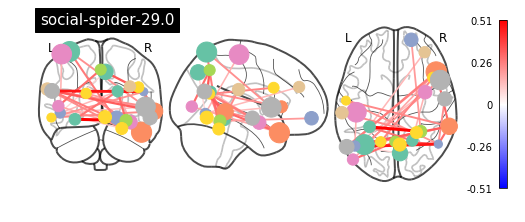

In [77]:
### social vs spider ###
p_original = []
t_original = []
significance_flags = np.zeros(4950,)
for i in range(4950):
    t,p = stats.ttest_ind(spider_vectors[:,i],social_vectors[:,i],)
    p_original.append(p)
    t_original.append(t)
p_corrected = smt.multipletests(p_original,method='fdr_by')[1]
for i in range(4950):
    if p_corrected[i] < 0.05 and t_original[i]<0:
        significance_flags[i] = 1
significant_edges = significance_flags.sum()
significance_flags =distance.squareform(significance_flags)
use_factors = np.where(significance_flags.sum(0) > 0)[0]
node_sizes = np.zeros(100,)
node_sizes[use_factors] = all_factor_widths[0,use_factors]
social_connectome = distance.squareform(social_vectors_mean) * (significance_flags)
if significant_edges > 0:
    niplot.plot_connectome(social_connectome,all_factor_centers[0,:,:],node_size=node_sizes,
                       colorbar=True,title='social-spider-'+str(significant_edges))#,edge_threshold="75%")
else:
    print('no significant edges found')

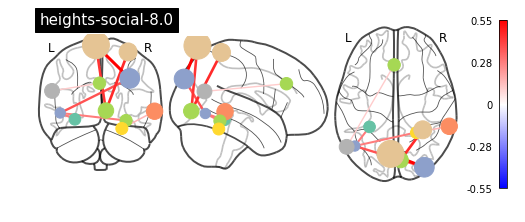

In [79]:
### heights vs social ###
p_original = []
t_original = []
significance_flags = np.zeros(4950,)
for i in range(4950):
    t,p = stats.ttest_ind(heights_vectors[:,i],social_vectors[:,i],)
    p_original.append(p)
    t_original.append(t)
p_corrected = smt.multipletests(p_original,method='fdr_by')[1]
for i in range(4950):
    if p_corrected[i] < 0.05 and t_original[i]>0:
        significance_flags[i] = 1
significant_edges = significance_flags.sum()
significance_flags =distance.squareform(significance_flags)
use_factors = np.where(significance_flags.sum(0) > 0)[0]
node_sizes = np.zeros(100,)
node_sizes[use_factors] = all_factor_widths[0,use_factors]
heights_connectome = distance.squareform(heights_vectors_mean) * (significance_flags)
if significant_edges > 0:
    niplot.plot_connectome(heights_connectome,all_factor_centers[0,:,:],node_size=node_sizes,
                       colorbar=True,title='heights-social-'+str(significant_edges))#,edge_threshold="75%")
else:
    print('no significant edges found')

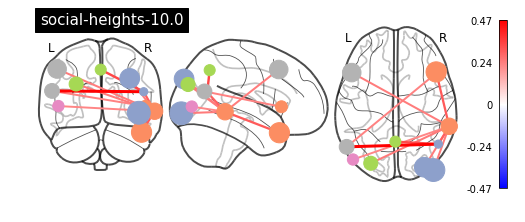

In [80]:
### social vs heights ###
p_original = []
t_original = []
significance_flags = np.zeros(4950,)
for i in range(4950):
    t,p = stats.ttest_ind(heights_vectors[:,i],social_vectors[:,i],)
    p_original.append(p)
    t_original.append(t)
p_corrected = smt.multipletests(p_original,method='fdr_by')[1]
for i in range(4950):
    if p_corrected[i] < 0.05 and t_original[i]<0:
        significance_flags[i] = 1
significant_edges = significance_flags.sum()
significance_flags =distance.squareform(significance_flags)
use_factors = np.where(significance_flags.sum(0) > 0)[0]
node_sizes = np.zeros(100,)
node_sizes[use_factors] = all_factor_widths[0,use_factors]
social_connectome = distance.squareform(social_vectors_mean) * (significance_flags)
if significant_edges > 0:
    niplot.plot_connectome(social_connectome,all_factor_centers[0,:,:],node_size=node_sizes,
                       colorbar=True,title='social-heights-'+str(significant_edges))#,edge_threshold="75%")
else:
    print('no significant edges found')

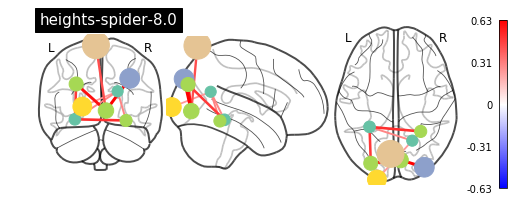

In [81]:
### heights vs spiders ###
p_original = []
t_original = []
significance_flags = np.zeros(4950,)
for i in range(4950):
    t,p = stats.ttest_ind(heights_vectors[:,i],spider_vectors[:,i],)
    p_original.append(p)
    t_original.append(t)
p_corrected = smt.multipletests(p_original,method='fdr_by')[1]
for i in range(4950):
    if p_corrected[i] < 0.05 and t_original[i]>0:
        significance_flags[i] = 1
significant_edges = significance_flags.sum()
significance_flags =distance.squareform(significance_flags)
use_factors = np.where(significance_flags.sum(0) > 0)[0]
node_sizes = np.zeros(100,)
node_sizes[use_factors] = all_factor_widths[0,use_factors]
heights_connectome = distance.squareform(heights_vectors_mean) * (significance_flags)
if significant_edges > 0:
    niplot.plot_connectome(heights_connectome,all_factor_centers[0,:,:],node_size=node_sizes,
                       colorbar=True,title='heights-spider-'+str(significant_edges))#,edge_threshold="75%")
else:
    print('no significant edges found')

In [82]:
### spiders vs heights ###
p_original = []
t_original = []
significance_flags = np.zeros(4950,)
for i in range(4950):
    t,p = stats.ttest_ind(heights_vectors[:,i],spider_vectors[:,i],)
    p_original.append(p)
    t_original.append(t)
p_corrected = smt.multipletests(p_original,method='fdr_by')[1]
for i in range(4950):
    if p_corrected[i] < 0.05 and t_original[i]<0:
        significance_flags[i] = 1
significant_edges = significance_flags.sum()
significance_flags =distance.squareform(significance_flags)
use_factors = np.where(significance_flags.sum(0) > 0)[0]
node_sizes = np.zeros(100,)
node_sizes[use_factors] = all_factor_widths[0,use_factors]
spider_connectome = distance.squareform(spider_vectors_mean) * significance_flags
if significant_edges > 0:
    niplot.plot_connectome(spider_connectome,all_factor_centers[0,:,:],node_size=node_sizes,
                       colorbar=True,title='spider-heights-'+str(significant_edges))#,edge_threshold="75%")
else:
    print('no significant edges found')

no significant edges found


In [61]:
def subject_block_labeler(block):
    return subject_labeler(block.subject)

In [62]:
### task classification using leave one out runs ###
from sklearn.svm import SVC
classifier = SVC(C=1., kernel="linear")

# A classifier to set the chance level
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier()

# Make a data splitting object for cross validation
from sklearn.model_selection import LeaveOneGroupOut, cross_val_score
cv = LeaveOneGroupOut()

for s in dtfa.subjects():
    print("Processing Subject %d" % (s))
    session_labels = []
    data = []
    targets = []
    for i in range(dtfa.num_blocks):
        block = dtfa._blocks[i]
        if block.subject == s:
            session_labels.append(block.run)
            data.append(all_weights[i,:,:].mean(0))
            targets.append(task_labeler(block.task))
    data = np.array(data)
    categories = np.unique(targets)

    for category in categories:
        print("Processing %s" % (category))
        classification_target = [t==category for t in targets]
        result = cross_val_score(
            classifier,
            data,
            classification_target,
            cv=cv,
            groups=session_labels,
    #         scoring="roc_auc",
        )

        result_chance = cross_val_score(
            dummy_classifier,
            data,
            classification_target,
            cv=cv,
            groups=session_labels,
    #         scoring="roc_auc",
        )

        print("Scores: %1.2f +- %1.2f" % (
            result.mean(),
            result.std()))

        print("Chance Scores: %1.2f +- %1.2f" % (
            result_chance.mean(),
            result_chance.std()))
        
    print ("\n")

Processing Subject 10
Processing Heights
Scores: 0.89 +- 0.04
Chance Scores: 0.56 +- 0.10
Processing Social threat
Scores: 0.86 +- 0.08
Chance Scores: 0.56 +- 0.04
Processing Spiders
Scores: 0.94 +- 0.04
Chance Scores: 0.56 +- 0.10


Processing Subject 11
Processing Heights
Scores: 0.86 +- 0.08
Chance Scores: 0.53 +- 0.10
Processing Social threat
Scores: 0.81 +- 0.16
Chance Scores: 0.58 +- 0.07
Processing Spiders
Scores: 0.72 +- 0.08
Chance Scores: 0.42 +- 0.00


Processing Subject 12
Processing Heights
Scores: 0.58 +- 0.18
Chance Scores: 0.50 +- 0.18
Processing Social threat
Scores: 0.58 +- 0.07
Chance Scores: 0.53 +- 0.08
Processing Spiders
Scores: 0.58 +- 0.07
Chance Scores: 0.50 +- 0.14


Processing Subject 13
Processing Heights
Scores: 0.78 +- 0.17
Chance Scores: 0.56 +- 0.10
Processing Social threat
Scores: 0.94 +- 0.04
Chance Scores: 0.64 +- 0.08
Processing Spiders
Scores: 0.86 +- 0.10
Chance Scores: 0.42 +- 0.07


Processing Subject 14
Processing Heights
Scores: 0.79 +- 0.04
Ch

In [63]:
data = all_weights.mean(1)
targets = []
subject_labels = []
session_labels = []
for i in range(dtfa.num_blocks):
    block = dtfa._blocks[i]
    session_labels.append(block.run)
    targets.append(task_labeler(block.task))
    subject_labels.append(block.subject)
categories = np.unique(targets)
for category in categories:
    print("Processing %s" % (category))
    classification_target = [t==category for t in targets]
    result = cross_val_score(
        classifier,
        data,
        classification_target,
        cv=cv,
        groups=subject_labels,
#         scoring="roc_auc",
    )

    result_chance = cross_val_score(
        dummy_classifier,
        data,
        classification_target,
        cv=cv,
        groups=subject_labels,
#         scoring="roc_auc",
    )

    print("Scores: %1.2f +- %1.2f" % (
        result.mean(),
        result.std()))

    print("Chance Scores: %1.2f +- %1.2f" % (
        result_chance.mean(),
        result_chance.std()))

Processing Heights
Scores: 0.64 +- 0.14
Chance Scores: 0.54 +- 0.07
Processing Social threat
Scores: 0.66 +- 0.12
Chance Scores: 0.54 +- 0.06
Processing Spiders
Scores: 0.68 +- 0.17
Chance Scores: 0.54 +- 0.06


In [64]:
from sklearn.feature_selection import SelectPercentile, f_classif
feature_selection = SelectPercentile(f_classif, percentile=5)
from sklearn.pipeline import Pipeline
svc = SVC(C=1., kernel="linear")
classifier = Pipeline([('anova', feature_selection), ('svc', svc)])
data = all_weights.mean(1)
targets = []
subject_labels = []
session_labels = []
data = []
for i in range(dtfa.num_blocks):
    block = dtfa._blocks[i]
    session_labels.append(block.run)
    targets.append(task_labeler(block.task))
    data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
    subject_labels.append(block.subject)
categories = np.unique(targets)
for category in categories:
    print("Processing %s" % (category))
    classification_target = [t==category for t in targets]
    result = cross_val_score(
        classifier,
        data,
        classification_target,
        cv=cv,
        groups=subject_labels,
#         scoring="roc_auc",
    )

    result_chance = cross_val_score(
        dummy_classifier,
        data,
        classification_target,
        cv=cv,
        groups=subject_labels,
#         scoring="roc_auc",
    )

    print("Scores: %1.2f +- %1.2f" % (
        result.mean(),
        result.std()))

    print("Chance Scores: %1.2f +- %1.2f" % (
        result_chance.mean(),
        result_chance.std()))

Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 8287  8405  8435 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 8287  8405  8435 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 8287  8405  8435 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 8287  8405  8435 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: Use

Scores: 0.65 +- 0.15
Chance Scores: 0.54 +- 0.09
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 8287  8405  8435 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 8287  8405  8435 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 8287  8405  8435 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 8287  8405  8435 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: Use

Scores: 0.62 +- 0.13
Chance Scores: 0.56 +- 0.08
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 8287  8405  8435 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 8287  8405  8435 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 8287  8405  8435 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 8287  8405  8435 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: Use

Scores: 0.68 +- 0.14
Chance Scores: 0.56 +- 0.09


In [65]:
for s in dtfa.subjects():
    print("Processing Subject %d" % (s))
    session_labels = []
    data = []
    targets = []
    for i in range(dtfa.num_blocks):
        block = dtfa._blocks[i]
        if block.subject == s:
            session_labels.append(block.run)
            data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
            targets.append(task_labeler(block.task))
    data = np.array(data)
    categories = np.unique(targets)

    for category in categories:
        print("Processing %s" % (category))
        classification_target = [t==category for t in targets]
        result = cross_val_score(
            classifier,
            data,
            classification_target,
            cv=cv,
            groups=session_labels,
    #         scoring="roc_auc",
        )

        result_chance = cross_val_score(
            dummy_classifier,
            data,
            classification_target,
            cv=cv,
            groups=session_labels,
    #         scoring="roc_auc",
        )

        print("Scores: %1.2f +- %1.2f" % (
            result.mean(),
            result.std()))

        print("Chance Scores: %1.2f +- %1.2f" % (
            result_chance.mean(),
            result_chance.std()))
        
    print ("\n")

Processing Subject 10
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7930 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7930 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7930 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.89 +- 0.08
Chance Scores: 0.64 +- 0.10
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7930 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.86 +- 0.04
Chance Scores: 0.67 +- 0.14
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7930 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7930 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.97 +- 0.04
Chance Scores: 0.58 +- 0.00


Processing Subject 11
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.83 +- 0.07
Chance Scores: 0.58 +- 0.14
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.86 +- 0.04
Chance Scores: 0.50 +- 0.14
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.75 +- 0.18
Chance Scores: 0.53 +- 0.04


Processing Subject 12
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7133 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.56 +- 0.10
Chance Scores: 0.64 +- 0.22
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7133 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.58 +- 0.07
Chance Scores: 0.64 +- 0.04
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7133 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.58 +- 0.07
Chance Scores: 0.64 +- 0.04


Processing Subject 13
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.83 +- 0.12
Chance Scores: 0.47 +- 0.17
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.89 +- 0.04
Chance Scores: 0.42 +- 0.12
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.81 +- 0.14
Chance Scores: 0.56 +- 0.04


Processing Subject 14
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7133 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.83 +- 0.08
Chance Scores: 0.58 +- 0.17
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7133 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.79 +- 0.04
Chance Scores: 0.42 +- 0.00
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7133 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.96 +- 0.04
Chance Scores: 0.62 +- 0.04


Processing Subject 15
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.83 +- 0.07
Chance Scores: 0.53 +- 0.08
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.78 +- 0.10
Chance Scores: 0.47 +- 0.08
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.81 +- 0.10
Chance Scores: 0.47 +- 0.04


Processing Subject 16
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7163  8255  8286 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7163  8255  8286 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.89 +- 0.04
Chance Scores: 0.64 +- 0.08
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7163  8255  8286 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7163  8255  8286 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.97 +- 0.04
Chance Scores: 0.64 +- 0.04
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7163  8255  8286 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7163  8255  8286 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.97 +- 0.04
Chance Scores: 0.56 +- 0.10


Processing Subject 17
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.89 +- 0.04
Chance Scores: 0.50 +- 0.00
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.89 +- 0.08
Chance Scores: 0.50 +- 0.07
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.78 +- 0.08
Chance Scores: 0.53 +- 0.04


Processing Subject 18
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7930  7962 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7162  7893 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.72 +- 0.04
Chance Scores: 0.56 +- 0.14
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7930  7962 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7162  7893 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.75 +- 0.07
Chance Scores: 0.61 +- 0.08
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7930  7962 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7162  7893 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.72 +- 0.04
Chance Scores: 0.64 +- 0.08


Processing Subject 19
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.78 +- 0.04
Chance Scores: 0.56 +- 0.04
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.89 +- 0.04
Chance Scores: 0.75 +- 0.07
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.75 +- 0.00
Chance Scores: 0.56 +- 0.10


Processing Subject 23
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7054  7134  7930 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.67 +- 0.00
Chance Scores: 0.38 +- 0.21
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7054  7134  7930 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.71 +- 0.04
Chance Scores: 0.42 +- 0.08
Processing Spiders
Scores: 0.71 +- 0.04
Chance Scores: 0.54 +- 0.04


Processing Subject 25


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7054  7134  7930 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)


Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7930  7961 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7162  7893 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.78 +- 0.08
Chance Scores: 0.64 +- 0.10
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7930  7961 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7162  7893 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.92 +- 0.00
Chance Scores: 0.53 +- 0.10
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7930  7961 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7162  7893 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.94 +- 0.04
Chance Scores: 0.56 +- 0.04


Processing Subject 26
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7893  7929 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.88 +- 0.04
Chance Scores: 0.62 +- 0.21
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7893  7929 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.75 +- 0.08
Chance Scores: 0.54 +- 0.04
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7134  7893  7929 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.67 +- 0.17
Chance Scores: 0.71 +- 0.04


Processing Subject 28
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7930 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.78 +- 0.08
Chance Scores: 0.56 +- 0.10
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7930 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.89 +- 0.04
Chance Scores: 0.47 +- 0.04
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7930 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7893 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.94 +- 0.04
Chance Scores: 0.61 +- 0.10


Processing Subject 29
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.89 +- 0.04
Chance Scores: 0.44 +- 0.04
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.92 +- 0.00
Chance Scores: 0.53 +- 0.08
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.92 +- 0.00
Chance Scores: 0.64 +- 0.10


Processing Subject 4
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.75 +- 0.07
Chance Scores: 0.64 +- 0.08
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.89 +- 0.10
Chance Scores: 0.53 +- 0.14
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7054  7106 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.89 +- 0.10
Chance Scores: 0.53 +- 0.14


Processing Subject 5
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.83 +- 0.07
Chance Scores: 0.61 +- 0.08
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.89 +- 0.04
Chance Scores: 0.42 +- 0.12
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.97 +- 0.04
Chance Scores: 0.50 +- 0.14


Processing Subject 6
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.50 +- 0.07
Chance Scores: 0.64 +- 0.14
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.56 +- 0.16
Chance Scores: 0.47 +- 0.04
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 7106  7134  7162 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.69 +- 0.04
Chance Scores: 0.61 +- 0.10


Processing Subject 7
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.58 +- 0.00
Chance Scores: 0.62 +- 0.21
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.38 +- 0.12
Chance Scores: 0.50 +- 0.00
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.62 +- 0.04
Chance Scores: 0.50 +- 0.00


Processing Subject 8
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.81 +- 0.04
Chance Scores: 0.64 +- 0.04
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.81 +- 0.04
Chance Scores: 0.47 +- 0.08
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.94 +- 0.04
Chance Scores: 0.64 +- 0.04


Processing Subject 9
Processing Heights


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.64 +- 0.04
Chance Scores: 0.47 +- 0.17
Processing Social threat


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.53 +- 0.14
Chance Scores: 0.47 +- 0.04
Processing Spiders


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)


Scores: 0.64 +- 0.10
Chance Scores: 0.44 +- 0.08




/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5944  7106  7134 ... 81635 81636 81637] are constant.
  UserWarning)
